# <span style="color:red"><center> Entrega2: Def del preprocessing </center></span>

In [1]:
import numpy as np
import cv2 as cv2
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns

Para el desarrollo del código lo que hice fue hacer una función unificada que se llama $preprocessing$ que usara dos funciones adicionales, una $preprocessing60$ que es usada cuando el valor del eje es de 60 máximo y una $preprocessing50$ cuando el valor del eje máximo es de 50. El método por el cual se evalúa si tiene o no 60 es que me dí cuenta desarrollando el código que cuando se establecen limites en los pixeles para que únicamente en la imagen queden dispuestos los números del eje sin nada más: cuando el número 60 existe y debido a que está todo en una misma amplitud porque la imagen siempre tiene el mismo tamaño, los pixeles en la línea 100 son coloreados, en tanto que cuando los pixeles de la línea 100 no están coloreados es que necesaiamente la escala está más espaciada y es de 50. El método entonces es un $if else$ en donde dependiendo de si el 100 está o no en el eje ($non_zero[0$]) va a usar la función 60 o la 50. No sé bien si al utilizarlo de ésta manera sea eficiente porque la primera parte de la función unificadora $preprocessing$ es binarizar todos los números del eje y probarlo. A mi me resulta rápido y lo ha hecho bien con 3 pruebas aleatorias que dejo en la parte de abajo del cuaderno. 

## Preguntas/Comentarios: 
1. No he logrado hacer que el $eje$ $y$ esté invertido como es supuesto a estar. Sigue quedando la gráfica de 50 a 0 por ejemplo y no de 0 a 50 hacia arriba. Esto es porque e la primera parte del problema cuando se lee la imagen por alguna razón el $eje$ $y$ lo desplaza positivamente con matplotlib hacia abajo... No sé como corregirlo aún, he estado dándole vueltas pero no he logrado nada concreto.
2. No estoy seguro de si hayan imágenes cuyo TEC sea superior a 60 o inferior a 50 y eso modifice el $if, $ $else$ inicial pero en lo que he podido ver ese análisis sencillo de una línea de pixeles siempre va a dar resultado porque no es posible que se crucen todas, creo que eso sustituye el OCR.
3. Dentro de la función está comentada la línea que usó el profe Daniel iniciando con las líneas de abajo. Cuando se prueba con ciertas imagenes funciona, pero con otras más no y el problema me apareció recurrentemente como un 477 out of index, no supe cómo solucionar eso ni qué significa. Entiendo que lo que se busca es hacer unas líneas de x,y con los puntos, pero no sé porqué falla... No lo usé, modifiqué un poco el código. Las líneas fueron:


"""

def map_values(px,py):
        x = val_x[px]
        y = val_y[py]
        return x,y
    
    x = []
    y = []
    for a in zip(non_zero[0],non_zero[1]):
        if a[0]!=0 or a[1]!=binaria.shape[1]-1:
            xs,ys = map_values(a[1],a[0])
            x.append(xs)
            y.append(ys)
"""

4. Para poder hacer la corrección de las escalas están las líneas que usan un $lambda$, es algo adicional que puse en los códigos también.

# <span style="color:lightblue"><center> Preprocessing para gráficas de 0 a 60 de TEC </center></span>

In [59]:
def preprocessing60(imagen):
    image = cv2.imread(imagen)
    image_cropped = image[61:549,102:670]
    grayimage = cv2.cvtColor(image_cropped, cv2.COLOR_BGR2GRAY)
    (thresh, binaria) = cv2.threshold(grayimage, 210,255, cv2.THRESH_BINARY)
    binaria -=255

    fig,(ax,ax1) = plt.subplots(nrows=1,ncols=2,figsize=(10,6))
    ax.imshow(image)
    ax1.imshow(binaria,cmap='binary')
    #Non zero:
    np.nonzero(binaria)
    binaria.shape
    np.set_printoptions(edgeitems=55, linewidth=250)
    #print(binaria[:30,:30])
    non_zero = np.nonzero(binaria)
    
    subsy = [0]
    for a in zip(non_zero[0],non_zero[1]):
        if a[1]==binaria.shape[1]-1:
            subsy.append(a[0])
    #Acá se va a hacer el append de las líneas horizontales en el -1, en el lado derecho
    subsy.append(binaria.shape[0]-1)
    subsy.reverse()
    #print(subsy)
    subsy = np.array(subsy)
    #Diferencias en 1d consecutivas ediff1d
    distancesy = np.abs(np.ediff1d(subsy))

    subsx = [0]
    #Para que cruce las coordenadas de x, con y
    for a in zip(non_zero[0],non_zero[1]):
        if a[0]==0:
            subsx.append(a[1])
    #El append lo que hace es que como va desplazado sobre el eje x superior
    #O sea a[0], va a agregar la coordenada del Y en donde hay no zero
    #Estas son las escalas
    #print(a, end=', ')
    subsx.append(binaria.shape[1]-1)
    subsx = np.array(subsx)
    distancesx = np.ediff1d(subsx)
    #print(distancesx, distancesx.shape)
    #print(distancesy, distancesy.shape)

    unitx = np.bincount(distancesx).argmax()
    unity = distancesy[1]
    #print(unitx)
    #print(unity)
    
    #Resultado de un OCR
    #Eje x
    end_x = 24
    #El límite de la escala en horas de 0 a 24
    x = list(range(end_x+1))
    val_x = []
    #En el rango, en paso de pixeles
    for i in range(len(x)-1):
        val_x.extend(np.linspace(x[i],x[i+1],distancesx[i],endpoint=False))
    val_x.append(end_x)
    val_x = np.array(val_x)
    #val_x = val_x[:binaria.shape[1]+1]
    # 23 excluido
    val_x.shape
    #val_x #Resoluciónd de la grila
    
    #Resultado de un OCR
    #Eje y
    end_y = 40
    #El límite de la escala en horas de 0 a 24
    y = list(range(0,end_y+6,5))
    y.reverse()
    val_y = []
    #En el rango, en paso de pixeles
    for i in range(len(y)-1):
        val_y.extend(np.linspace(y[i],y[i+1],unity-1,endpoint=False))
    val_y = np.array(val_y)
    #val_y = val_y[:binaria.shape[0]]
    val_y.shape
    
    """
    def map_values(px,py):
        x = val_x[px]
        y = val_y[py]
        return x,y
    
    x = []
    y = []
    for a in zip(non_zero[0],non_zero[1]):
        if a[0]!=0 or a[1]!=binaria.shape[1]-1:
            xs,ys = map_values(a[1],a[0])
            x.append(xs)
            y.append(ys)
    """
    fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,6))
    ax.plot(non_zero[1],non_zero[0],marker='.',color='black',linestyle='')
    #ax.invert_xaxis()
    ax.set_ylim(0,488)
    ax.invert_yaxis()
    ax.set_xlim(0,567)
    
    #Parte 2:
    pruebay = list(map(lambda x: 10*(x/80.7),non_zero[0]))
    pruebax = list(map(lambda x: x/23.85,non_zero[1]))
    fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,6))
    ax.plot(pruebax,pruebay,marker='.',color='black',linestyle='')
    ax.set_ylim(0,60)
    ax.invert_yaxis()
    ax.set_xlim(0.2,23.6)
    ax.set_title('GRÁFICA CONVERTIDA')
    ax.set_xlabel('Horas del día')
    ax.set_ylabel('TEC dividiro por 10')
    #ax.set_yticks([0,10,20,30,40,50,60])
    #ax.legend()
    ax.plot()

# <span style="color:lightblue"><center> Preprocessing para gráficas de 0 a 50 de TEC </center></span>

In [60]:
def preprocessing50(imagen):
    image = cv2.imread(imagen)
    image_cropped = image[61:549,102:670]
    grayimage = cv2.cvtColor(image_cropped, cv2.COLOR_BGR2GRAY)
    (thresh, binaria) = cv2.threshold(grayimage, 210,255, cv2.THRESH_BINARY)
    binaria -=255

    fig,(ax,ax1) = plt.subplots(nrows=1,ncols=2,figsize=(10,6))
    ax.imshow(image)
    ax1.imshow(binaria,cmap='binary')
    #Non zero:
    np.nonzero(binaria)
    binaria.shape
    np.set_printoptions(edgeitems=55, linewidth=250)
    #print(binaria[:30,:30])
    non_zero = np.nonzero(binaria)
    
    subsy = [0]
    for a in zip(non_zero[0],non_zero[1]):
        if a[1]==binaria.shape[1]-1:
            subsy.append(a[0])
    #Acá se va a hacer el append de las líneas horizontales en el -1, en el lado derecho
    subsy.append(binaria.shape[0]-1)
    subsy.reverse()
    #print(subsy)
    subsy = np.array(subsy)
    #Diferencias en 1d consecutivas ediff1d
    distancesy = np.abs(np.ediff1d(subsy))

    subsx = [0]
    #Para que cruce las coordenadas de x, con y
    for a in zip(non_zero[0],non_zero[1]):
        if a[0]==0:
            subsx.append(a[1])
    #El append lo que hace es que como va desplazado sobre el eje x superior
    #O sea a[0], va a agregar la coordenada del Y en donde hay no zero
    #Estas son las escalas
    #print(a, end=', ')
    subsx.append(binaria.shape[1]-1)
    subsx = np.array(subsx)
    distancesx = np.ediff1d(subsx)
    #print(distancesx, distancesx.shape)
    #print(distancesy, distancesy.shape)

    unitx = np.bincount(distancesx).argmax()
    unity = distancesy[1]
    #print(unitx)
    #print(unity)
    
    #Resultado de un OCR
    #Eje x
    end_x = 24
    #El límite de la escala en horas de 0 a 24
    x = list(range(end_x+1))
    val_x = []
    #En el rango, en paso de pixeles
    for i in range(len(x)-1):
        val_x.extend(np.linspace(x[i],x[i+1],distancesx[i],endpoint=False))
    val_x.append(end_x)
    val_x = np.array(val_x)
    #val_x = val_x[:binaria.shape[1]+1]
    # 23 excluido
    val_x.shape
    #val_x #Resoluciónd de la grila
    
    #Resultado de un OCR
    #Eje y
    end_y = 40
    #El límite de la escala en horas de 0 a 24
    y = list(range(0,end_y+6,5))
    y.reverse()
    val_y = []
    #En el rango, en paso de pixeles
    for i in range(len(y)-1):
        val_y.extend(np.linspace(y[i],y[i+1],unity-1,endpoint=False))
    val_y = np.array(val_y)
    #val_y = val_y[:binaria.shape[0]]
    val_y.shape
    
    """
    def map_values(px,py):
        x = val_x[px]
        y = val_y[py]
        return x,y
    
    x = []
    y = []
    for a in zip(non_zero[0],non_zero[1]):
        if a[0]!=0 or a[1]!=binaria.shape[1]-1:
            xs,ys = map_values(a[1],a[0])
            x.append(xs)
            y.append(ys)
    """
    fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,6))
    ax.plot(non_zero[1],non_zero[0],marker='.',color='black',linestyle='')
    #ax.invert_xaxis()
    ax.set_ylim(0,488)
    ax.invert_yaxis()
    ax.set_xlim(0,567)
    
    #Parte 2:
    pruebay = list(map(lambda x: 10*(x/97.6),non_zero[0]))
    pruebax = list(map(lambda x: x/23.85,non_zero[1]))
    fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,6))
    ax.plot(pruebax,pruebay,marker='.',color='black',linestyle='')
    ax.set_ylim(0,50)
    ax.invert_yaxis()
    ax.set_xlim(0.2,23.6)
    ax.set_title('GRÁFICA CONVERTIDA')
    ax.set_xlabel('Horas del día')
    ax.set_ylabel('TEC dividiro por 10')
    #ax.set_yticks([0,10,20,30,40,50,60])
    #ax.legend()
    ax.plot()

# <span style="color:red"><center> USO DE UNA FUNCIÓN UNIFICADA</center></span>

In [61]:
def preprocessing(imagen):
    image = cv2.imread(imagen)
    image_cropped = image[40:500,70:95]
    grayimage = cv2.cvtColor(image_cropped, cv2.COLOR_BGR2GRAY)
    (thresh, binaria) = cv2.threshold(grayimage, 210,255, cv2.THRESH_BINARY)
    binaria -=255
    #print(binaria[:30,:30])
    non_zero = np.nonzero(binaria)
    subsy = [0]
    for a in zip(non_zero[0],non_zero[1]):
        if a[1]==binaria.shape[1]-1:
            subsy.append(a[0])
    #Acá se va a hacer el append de las líneas horizontales en el -1, en el lado derecho
    subsy.append(binaria.shape[0]-1)
    subsy.reverse()
    #print(subsy)
    subsy = np.array(subsy)
    #Diferencias en 1d consecutivas ediff1d
    distancesy = np.abs(np.ediff1d(subsy))
    subsx = [0]
    #Para que cruce las coordenadas de x, con y
    for a in zip(non_zero[0],non_zero[1]):
        if a[0]==0:
            subsx.append(a[1])
    #El append lo que hace es que como va desplazado sobre el eje x superior
    #O sea a[0], va a agregar la coordenada del Y en donde hay no zero
    #Estas son las escalas
    #print(a, end=', ')
    subsx.append(binaria.shape[1]-1)
    subsx = np.array(subsx)
    distancesx = np.ediff1d(subsx)
    #print(distancesx, distancesx.shape)
    #print(distancesy, distancesy.shape)

    unitx = np.bincount(distancesx).argmax()
    unity = distancesy[0]
    #print(unitx)
    #print(unity)
    if 100 in non_zero[0]:
        print('Tiene hasta 60')
        preprocessing60(imagen)
    else:
        print('Tiene hasta 50')
        preprocessing50(imagen)

Tiene hasta 60


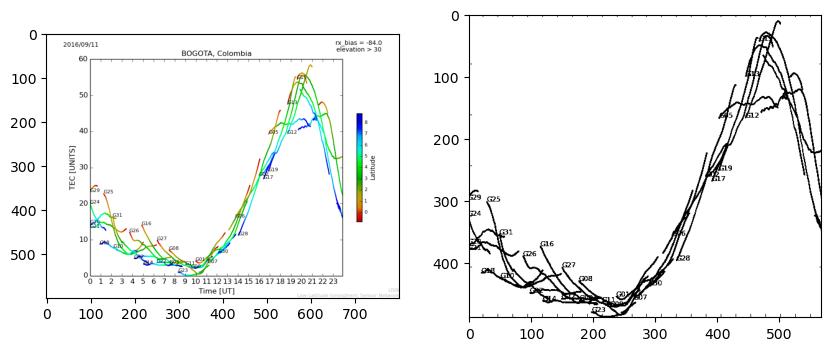

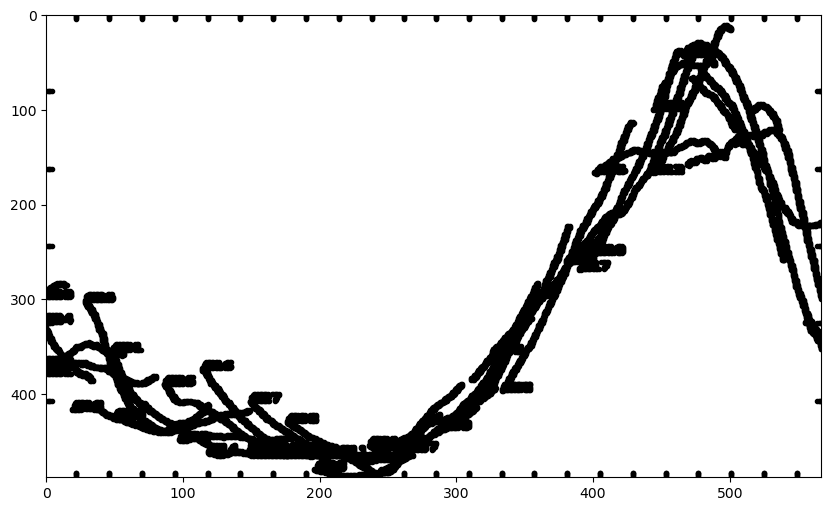

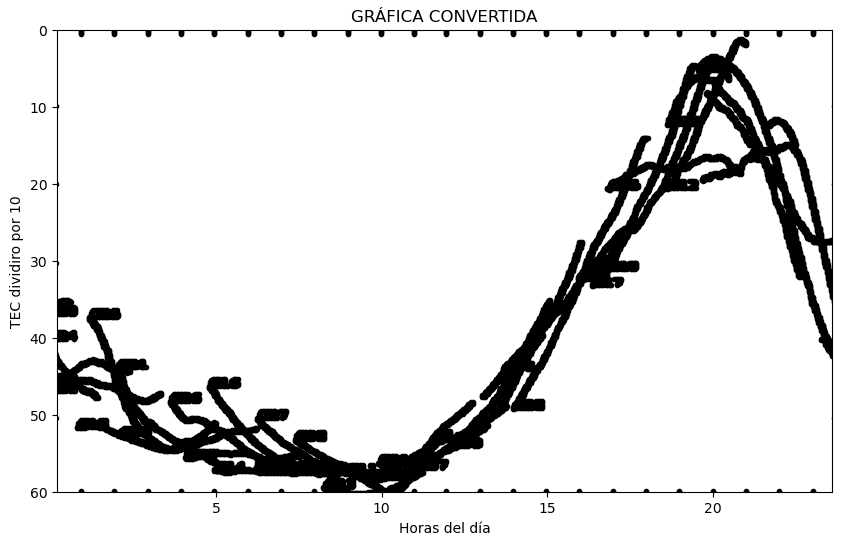

In [64]:
preprocessing('prueba1.png')

Tiene hasta 50


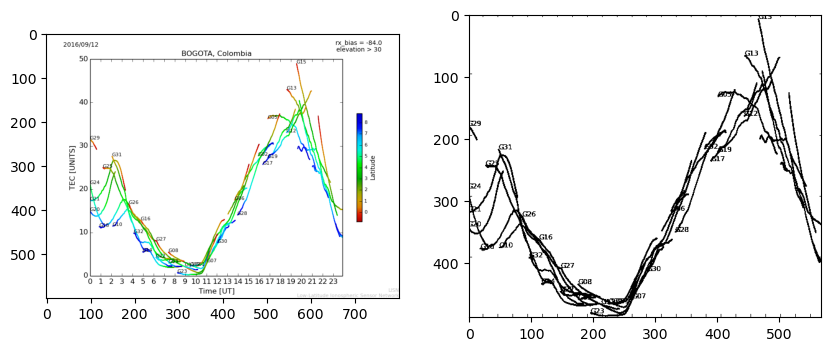

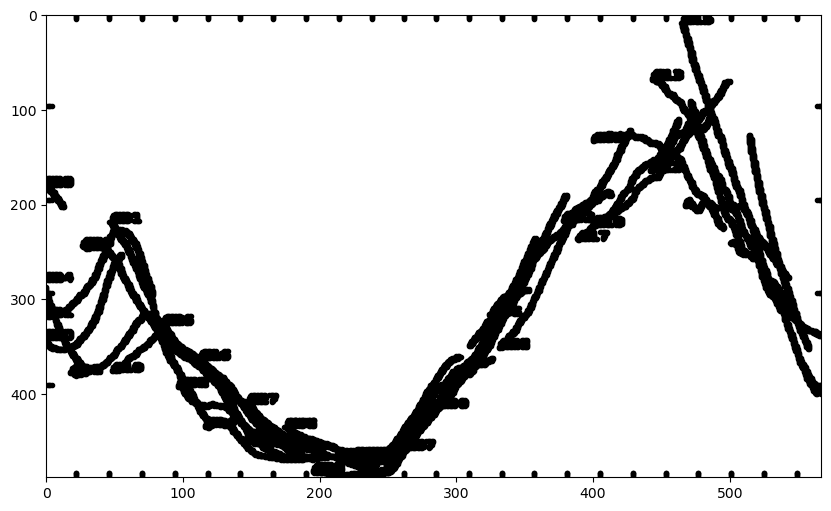

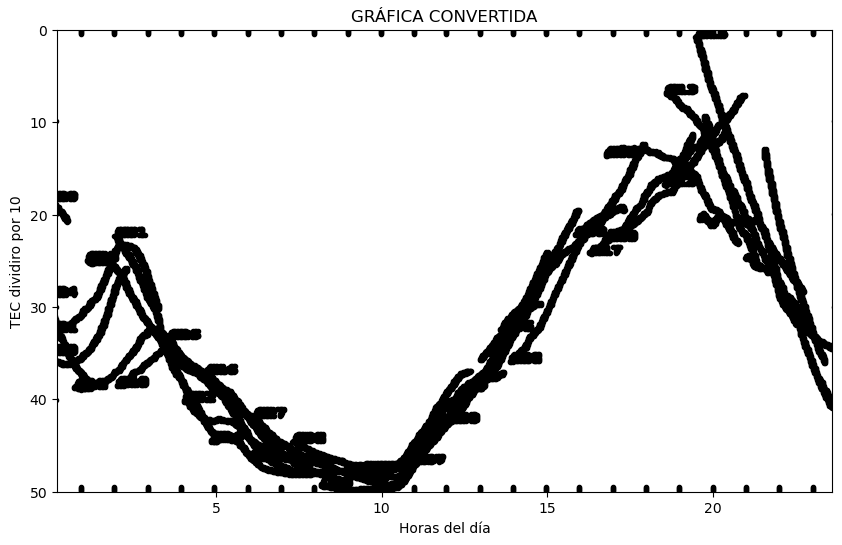

In [65]:
preprocessing('prueba2.png')

Tiene hasta 60


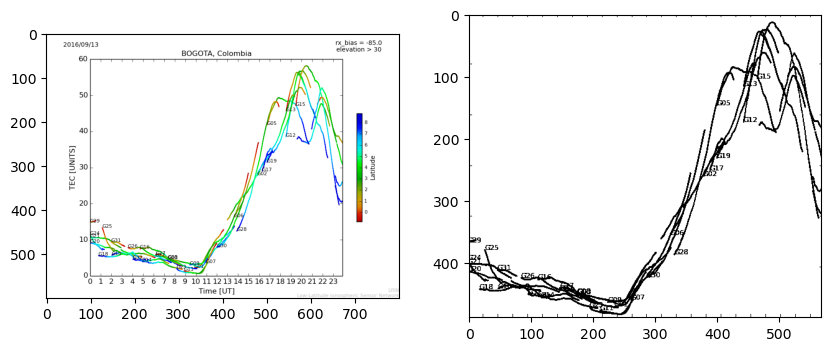

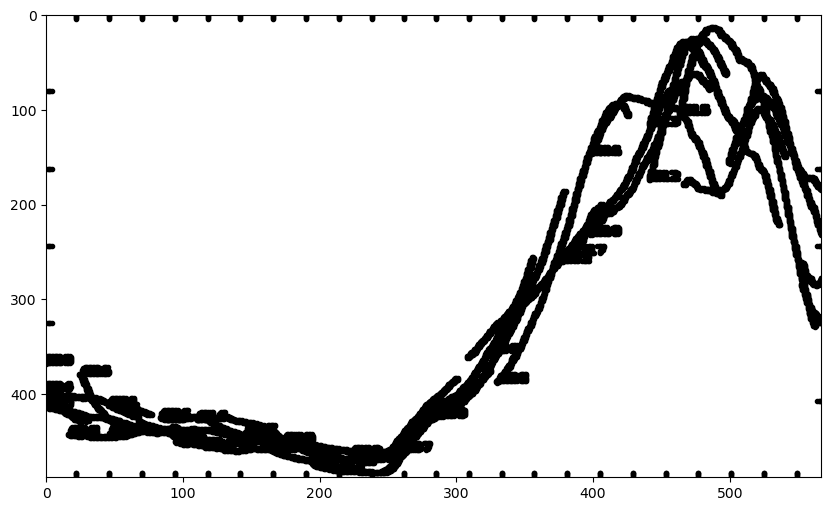

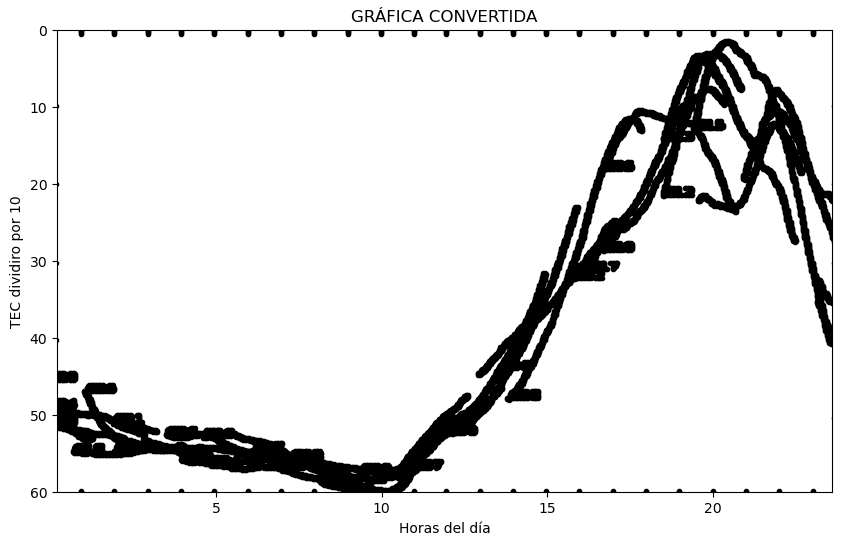

In [66]:
preprocessing('prueba3.png')